KNN Cross-Validation Accuracy: 0.7249720821813845 ± 0.019952718083979814
Logistic Regression Cross-Validation Accuracy: 0.838017021737952 ± 0.05212746897176803
Random Forest Cross-Validation Accuracy: 0.920352360817477 ± 0.08179099483420356


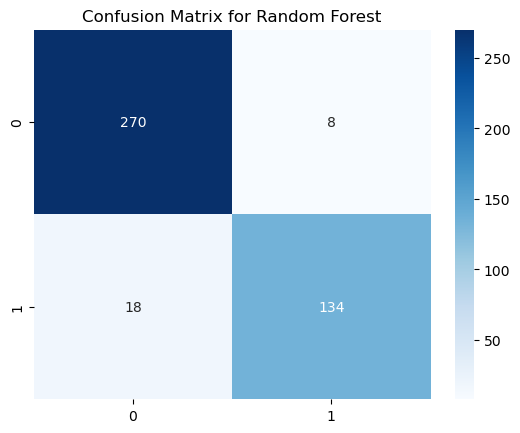

Random Forest Accuracy: 0.9395348837209302
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       278
         1.0       0.94      0.88      0.91       152

    accuracy                           0.94       430
   macro avg       0.94      0.93      0.93       430
weighted avg       0.94      0.94      0.94       430



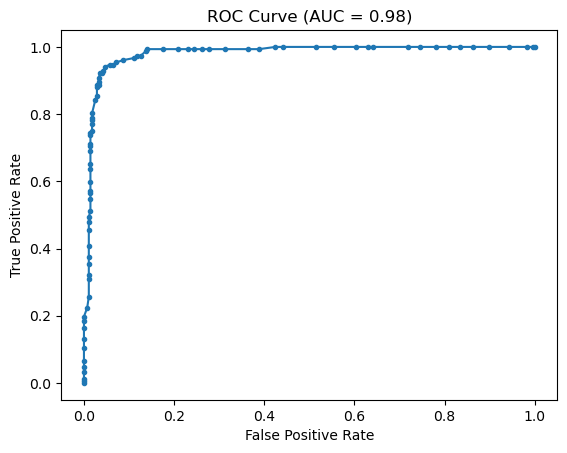

In [24]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"c:\Users\jaina\OneDrive\Desktop\KDD\Project\alzheimers_disease_data.csv")  # Update with your file path

# Replace any known invalid entries with NaN
data.replace('XXXConfid', np.nan, inplace=True)

# Drop columns with all missing values (if any)
data.dropna(axis=1, how='all', inplace=True)

# Impute missing values with the mean (or another strategy)
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(data)

# Create a new DataFrame with the imputed data
data = pd.DataFrame(imputed_data, columns=data.columns)

# Ensure that categorical variables are encoded
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

# Splitting the dataset into features and target
X = data.drop(['Diagnosis'], axis=1)
y = data['Diagnosis']

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the models
knn = KNeighborsClassifier(n_neighbors=5)
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100)

# Cross-validation for KNN
skf = StratifiedKFold(n_splits=5)
cv_scores_knn = cross_val_score(knn, X, y, cv=skf, scoring='accuracy')
print(f"KNN Cross-Validation Accuracy: {cv_scores_knn.mean()} ± {cv_scores_knn.std()}")

# Cross-validation for Logistic Regression
cv_scores_log_reg = cross_val_score(log_reg, X, y, cv=skf, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy: {cv_scores_log_reg.mean()} ± {cv_scores_log_reg.std()}")

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf, X, y, cv=skf, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {cv_scores_rf.mean()} ± {cv_scores_rf.std()}")

# Train and predict with Random Forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation with Confusion Matrix and ROC Curve for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

# ROC Curve and AUC Score
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
